<a href="https://colab.research.google.com/github/Amirnagy/pdsnd_github/blob/master/imaage_calssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
# my image 
images = []
#data after transform 2d metrics to 1d metrics for every photo
flatten_data = []
director = '/content/images'
CATEGORTES = ['car'  , 'door' , 'ice cream']
for category in CATEGORTES:
  class_num = CATEGORTES.index(category)
  path = os.path.join(director,category)
  for img in os.listdir(path):
    img_array =  imread(os.path.join(path,img))
    img_resize = resize(img_array,(150,150,3))#normalize value from 0 to 1
    flatten_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(class_num)

flatten_data  = np.array(flatten_data)
target =  np.array(target)
images = np.array(images)

# print(flatten_data)
# print("%%%%%%%%%%%%%%%%%%%%%%%")
# print(target)
# print("%%%%%%%%%%%%%%%%%%%%%%%")
# print(images)

<BarContainer object of 3 artists>

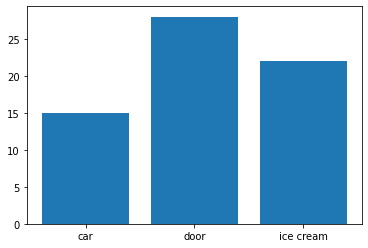

In [2]:
# import matplotlib.pyplot as plt

unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORTES,count)

In [3]:
from sklearn.model_selection import train_test_split
# split data to traning and testing 
x_train,x_test , y_train,y_test = train_test_split(flatten_data,target,test_size=0.3,random_state=109)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
    {'C':[1,10,100,1000],'kernel':['linear']},
    {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)



GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [5]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1])

In [6]:
y_test 

array([1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [8]:
accuracy_score(y_pred , y_test)

0.65

In [9]:
confusion_matrix(y_pred,y_test)

array([[ 2,  1,  1],
       [ 0, 10,  2],
       [ 0,  3,  1]])

In [10]:
# saving the model using pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [11]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://static.turbosquid.com/Preview/2019/12/25__04_57_40/EmptyIceCreamCone3dmodel000.jpgA8782A8A-A3E2-415D-941D-F8C13B03C0EELarge.jpg
(600, 600, 3)
PREDICTED:ice cream


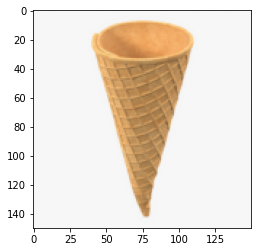

In [13]:
# testing a brand new image 

flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = CATEGORTES[y_out[0]]
print(f'PREDICTED MODEL:{y_out}')

In [14]:
# !pip install streamlit
# !pip install pyngrok

     |████████████████████████████████| 10.1 MB 4.9 MB/s 
     |████████████████████████████████| 164 kB 52.0 MB/s 
     |████████████████████████████████| 111 kB 48.0 MB/s 
     |████████████████████████████████| 181 kB 44.2 MB/s 
     |████████████████████████████████| 76 kB 4.8 MB/s 
     |████████████████████████████████| 4.3 MB 20.8 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 131 kB 49.8 MB/s 
     |████████████████████████████████| 130 kB 34.4 MB/s 
     |████████████████████████████████| 793 kB 48.9 MB/s 
     |████████████████████████████████| 428 kB 47.9 MB/s 
     |████████████████████████████████| 381 kB 53.2 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=ed7fd7c3ed66c75ee775189c31d6960cae26699380c42b97aa4fe7290955f424
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
  Created wheel for validators: filename=validators

     |████████████████████████████████| 745 kB 5.3 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=e41ad1f23ed77db43416ddae96939483a6650c778db267ba1d8aa278024dd04c
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [1]:
# from pyngrok import ngrok

In [2]:
# %%writefile app.py
# import streamlit as st 
# st.title('Image classification')


Writing app.py
